In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\electric_vechicle.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [3]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [4]:
print ("dataset:",df.shape) 

dataset: (191407, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,191403.000000,191407.000000,191407.000000,191407.000000,190993.000000,1.914070e+05,1.914030e+05
mean,98177.823603,2020.732303,55.657442,994.773258,29.016880,2.237202e+08,5.297759e+10
std,2392.808886,2.990447,90.151930,8050.523372,14.909417,7.398058e+07,1.573588e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.861622e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.328176e+08,5.303303e+10
75%,98371.000000,2023.000000,72.000000,0.000000,42.000000,2.589708e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [7]:
df.fillna(0, inplace=True)

In [8]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [9]:
ev_data= df.dropna()

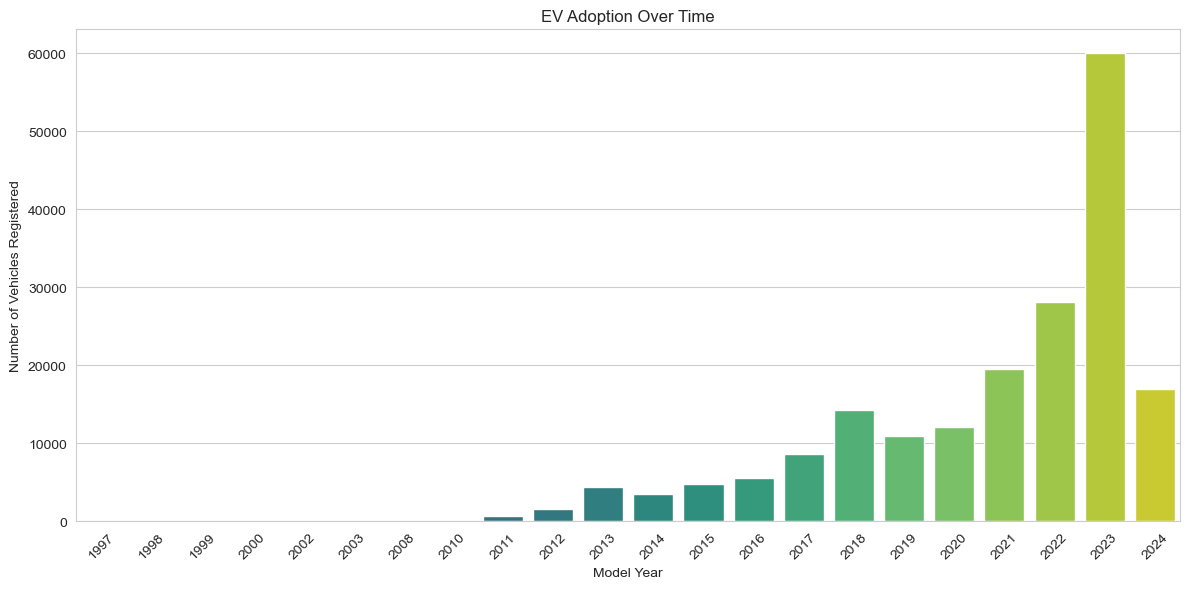

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

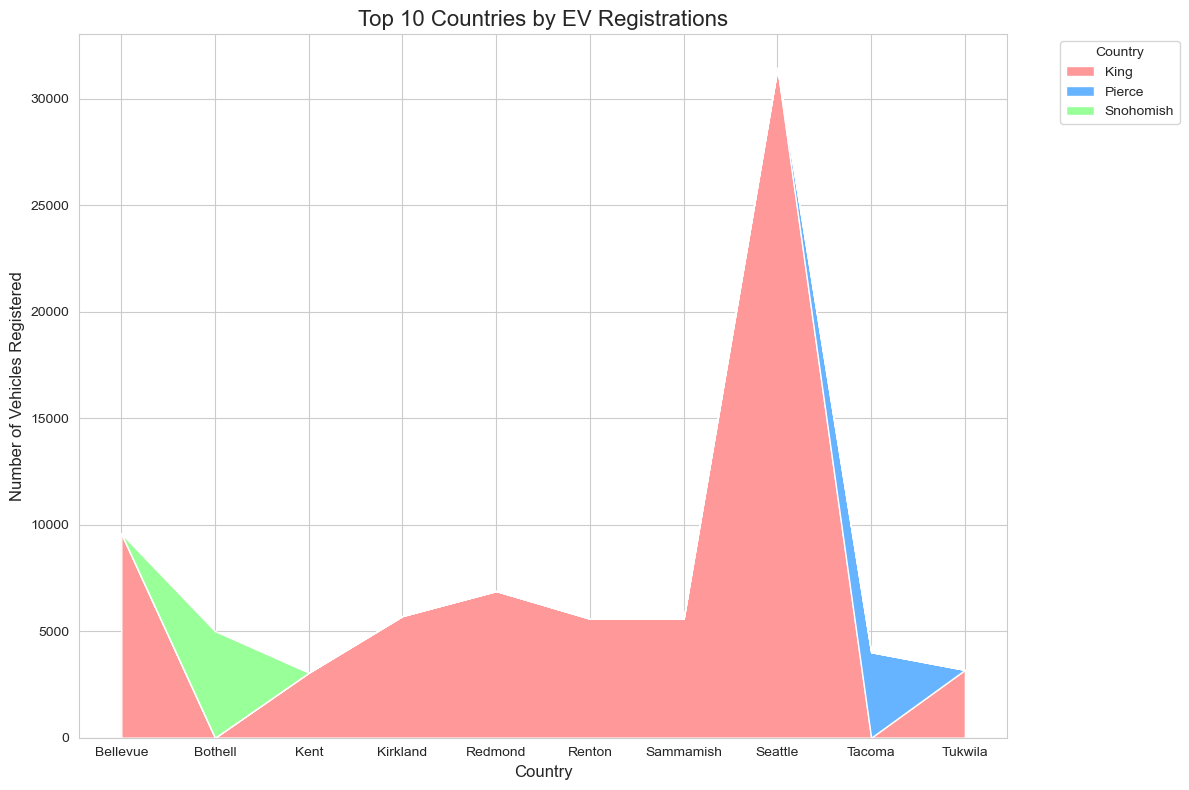

In [11]:
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().reset_index(name='Number of Vehicles')
top_cities = ev_city_distribution_top_counties.sort_values('Number of Vehicles', ascending=False).head(10)
city_pivot = top_cities.pivot(index='City', columns='County', values='Number of Vehicles').fillna(0)
plt.figure(figsize=(12, 8))
plt.stackplot(city_pivot.index, city_pivot.T, labels=city_pivot.columns, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Top 10 Countries by EV Registrations', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


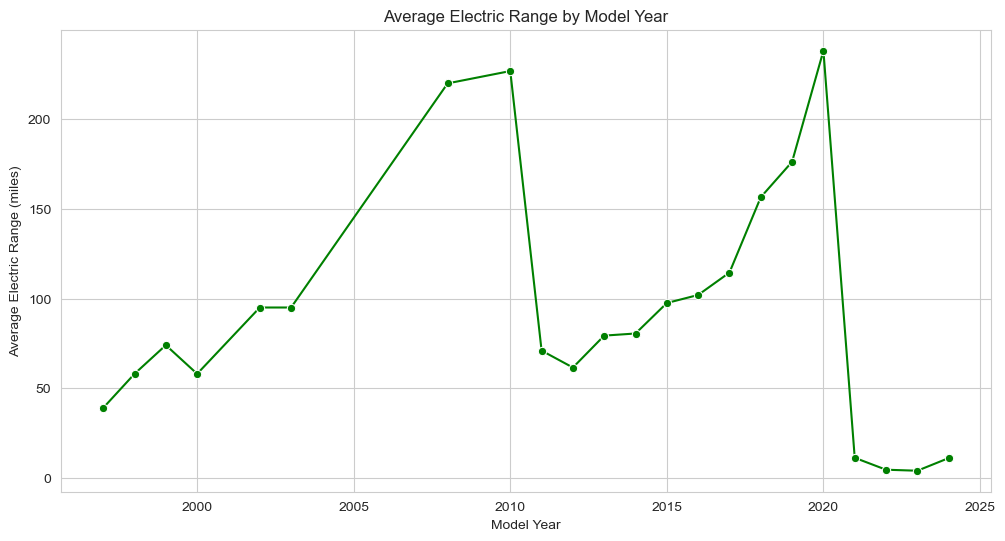

In [12]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

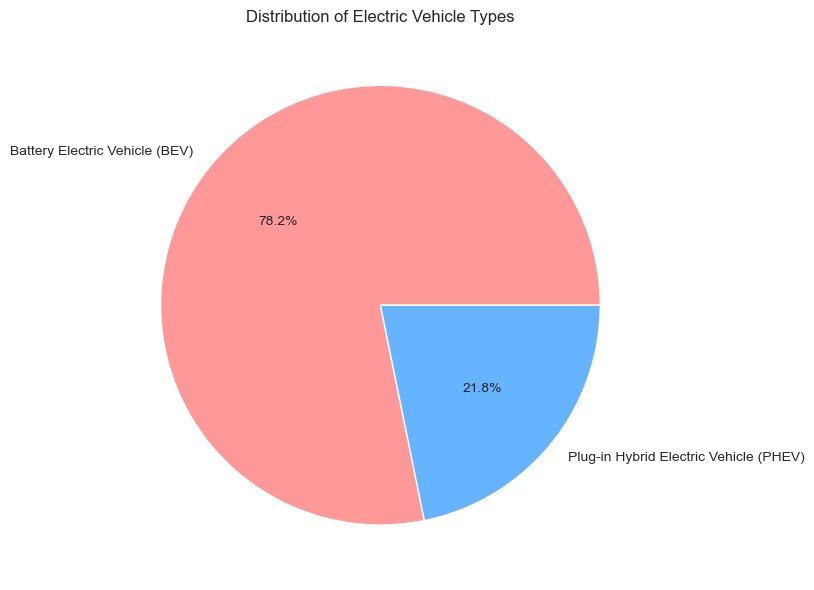

In [13]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
plt.figure(figsize=(10, 6))
plt.pie(ev_type_distribution, labels=ev_type_distribution.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Distribution of Electric Vehicle Types')
plt.tight_layout()
plt.show()

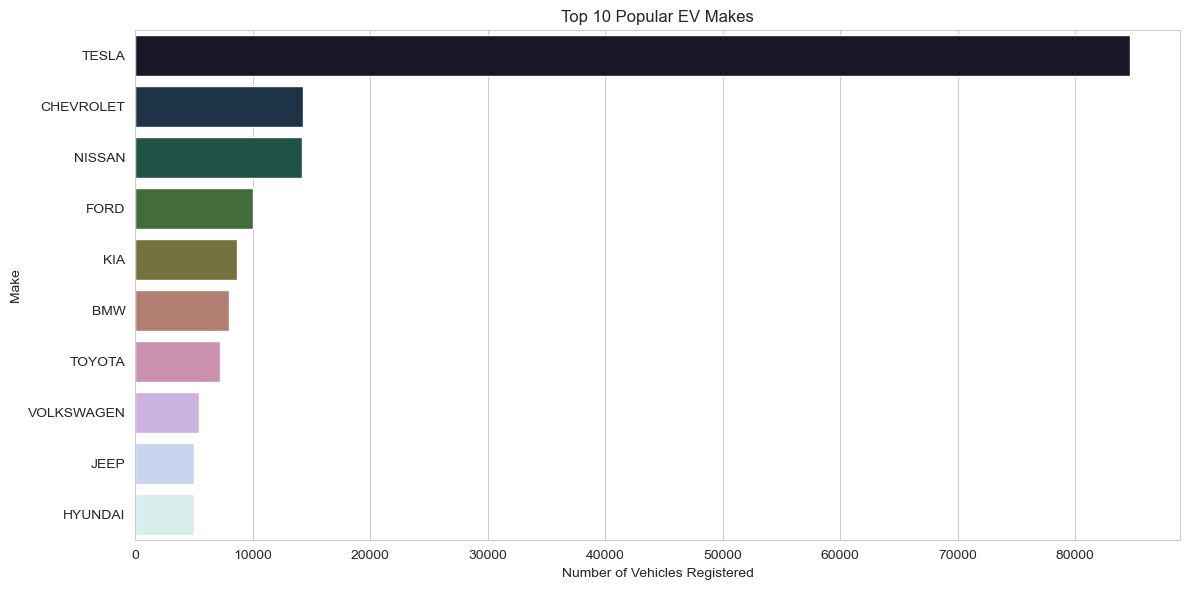

In [14]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


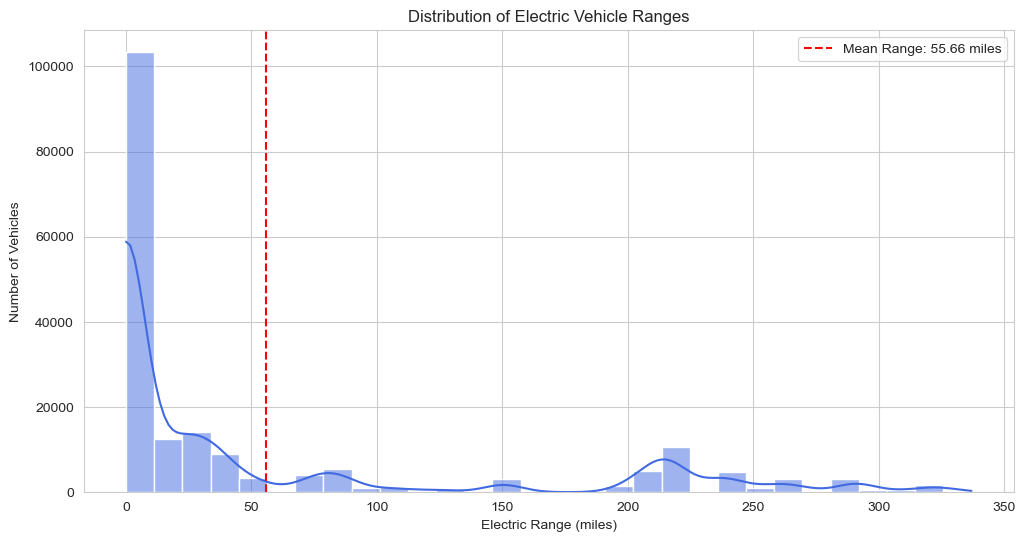

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

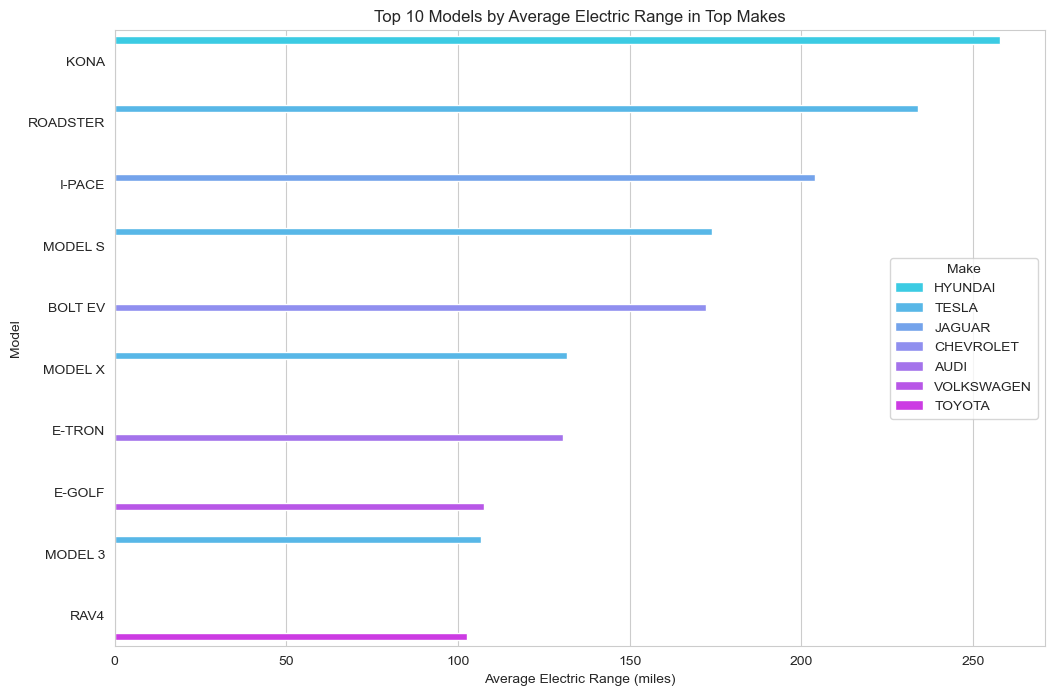

In [16]:
average_range_by_model = df.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [17]:
# Identify Models and Makes with Low Battery Range but High Base MSRP
low_battery_high_msrp = df[(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range') & (df['Base MSRP'] > 50000)]
print(low_battery_high_msrp[['Make', 'Model', 'Base MSRP', 'Electric Range']])

         Make Model  Base MSRP  Electric Range
299       BMW  530E      52650              16
303     VOLVO  XC90      64950              19
333       BMW  530E      54950              14
368     VOLVO  XC60      52900              17
540       BMW  530E      53400              16
...       ...   ...        ...             ...
188960    BMW  530E      52650              16
189526  VOLVO  XC60      52900              17
189612    BMW  530E      53400              16
190251    BMW  740E      89100              14
191116    BMW  530E      54950              14

[657 rows x 4 columns]


In [18]:
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       21
2010       24
2011      736
2012     1595
2013     4363
2014     3533
2015     4818
2016     5528
2017     8650
2018    14340
2019    10933
2020    12149
2021    19531
2022    28116
2023    60084
2024    16969
Name: count, dtype: int64

In [20]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

df = df.sort_values('Model Year')

X = df[['Model Year']]  
y = df['Electric Range']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', # For regression tasks
    n_estimators=1000,            # Number of boosting rounds
    learning_rate=0.01,           # Learning rate
    max_depth=5,                  # Maximum tree depth
    subsample=0.8,                # Subsample ratio of the training instance
    colsample_bytree=0.8,         # Subsample ratio of columns when constructing each tree
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_set=[(X_test_scaled, y_test)], verbose=False)

y_pred = xgb_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Root Mean Squared Error: 50.298580065290025
R² score: 0.6884538130342036


In [21]:
from sklearn.tree import DecisionTreeRegressor
df = df.sort_values('Model Year')

X = df[['Model Year']]  
y = df['Electric Range']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

Root Mean Squared Error: 49.8676158177755
R² score: 0.6919408887450232


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load the dataset from your local file
df = pd.read_csv(r"C:\Users\Hp\Downloads\electric_vechicle.csv")

# Preprocessing: Selecting relevant features and handling missing values
df_clean = df[['Model Year', 'Make', 'Base MSRP', 'Electric Vehicle Type', 'Electric Range']].dropna()

# Encoding categorical features (Make and Electric Vehicle Type)
df_clean_encoded = pd.get_dummies(df_clean, columns=['Make', 'Electric Vehicle Type'], drop_first=True)

# Splitting the dataset into features (X) and target (y)
X = df_clean_encoded.drop('Electric Range', axis=1)
y = df_clean_encoded['Electric Range']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating the R² score and Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Output the results
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)


R² Score: 0.9889505239110224
Mean Absolute Error (MAE): 2.513698800632869


In [23]:
from scipy.optimize import curve_fit
import numpy as np
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2024]

def exp_growth(x, a, b):
    return a * np.exp(b * x)

x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

params, covariance = curve_fit(exp_growth, x_data, y_data)

forecast_years = np.arange(2025, 2025 + 10) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2025: 46248.46584291814, 2026: 56474.32025414205, 2027: 68961.18152329525, 2028: 84208.97384311732, 2029: 102828.15808942325, 2030: 125564.17224323697, 2031: 153327.27575863275, 2032: 187228.9927259091, 2033: 228626.61286920332, 2034: 279177.5320212538}


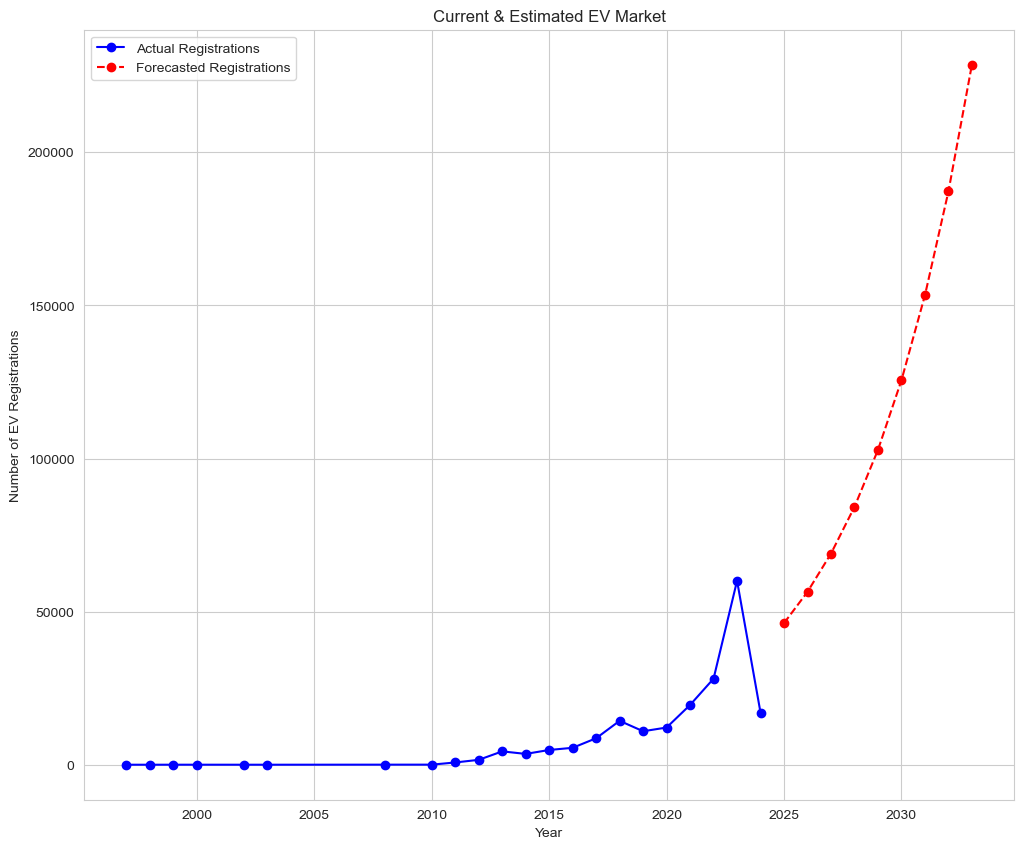

In [24]:
years = np.arange(filtered_years.index.min(), 2033 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2025, 2033 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 10))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()